In [1]:
import numpy as np
import pandas as pd
# plots
import seaborn as sns; sns.set_theme()
sns.set(palette='colorblind')
import matplotlib.pyplot as plt

Alexandre Dias Negretti	233609	
Daniel Godoy Marques	166213	
Gyovana Mayara Moriyama	216190	

In [2]:
path = '../data/processed/'
df_train = pd.read_csv(path + 'scenario03.csv', sep=',')
df_test = pd.read_csv(path + 'scenario04.csv', sep=',')

# Exploratory Data Analysis

## Features exploration

### Gender

The gender distribuition is even between the two genders

count     630
unique      2
top         F
freq      318
Name: gender, dtype: object


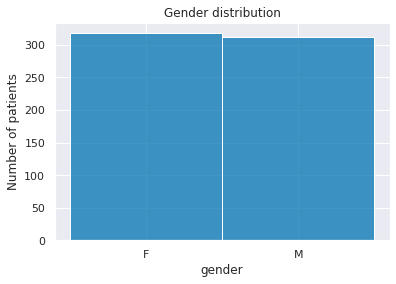

In [ ]:
print(df_train['gender'].describe())
sns.histplot(data=df_train['gender']).set(title='Gender distribution', xlabel = 'gender', ylabel = 'Number of patients')
plt.show()

### Encounterclass

The most predominant value of encounterclass is 'inpatient'. Since thrombosis is a clinical condition, inpatient is the most common for a patient.

count           630
unique            4
top       inpatient
freq            614
Name: encounterclass, dtype: object


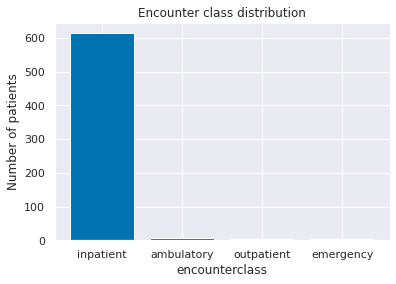

In [ ]:
print(df_train['encounterclass'].describe())
plt.bar(df_train['encounterclass'].unique(), df_train['encounterclass'].value_counts())
plt.title('Encounter class distribution')
plt.xlabel('encounterclass')
plt.ylabel('Number of patients')
plt.show()

### Organization

A important analysis for the hospitals are the number of deaths for each of them. A high number of deaths may be due to a high number of occurences.

In [ ]:
df_train['organization'].describe()

count                        630
unique                        81
top       HALLMARK HEALTH SYSTEM
freq                          31
Name: organization, dtype: object

In [ ]:
df_unique_h = df_train[['organization']].value_counts().to_frame()
df_unique_h_target = df_train[['organization', 'target']].groupby(by='organization').sum()
df_unique_h_target = df_unique_h_target.reset_index()

df_unique_h_merged = pd.merge(df_unique_h_target, df_unique_h, on='organization')
df_unique_h_merged = df_unique_h_merged.sort_values(by=['target'], ascending=False)
df_unique_h_merged.columns = ['organization', 'sum of deaths', 'total occurrences']

In [ ]:
df_unique_h_merged

,organization,sum of deaths,total occurrences
65,SAINT ANNE'S HOSPITAL,10,15
26,FALMOUTH HOSPITAL,10,21
41,LOWELL GENERAL HOSPITAL,7,26
31,HALLMARK HEALTH SYSTEM,6,31
73,STURDY MEMORIAL HOSPITAL,5,15
...,...,...,...
36,HOLYOKE MEDICAL CENTER,0,11
46,MASSACHUSETTS EYE AND EAR INFIRMARY -,0,6
45,MARTHA'S VINEYARD HOSPITAL INC,0,3
44,MARLBOROUGH HOSPITAL,0,4


Text(0.5, 0, 'Number of patients')

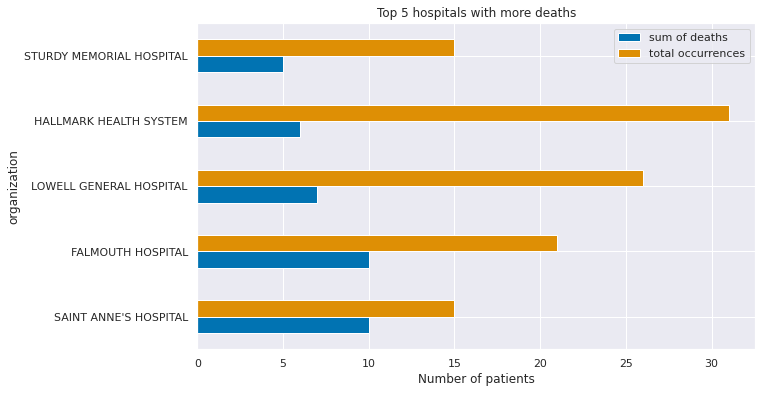

In [ ]:
df_unique_h_merged.head().plot(kind = 'barh', x='organization', figsize=(10,6)).set(title='Top 5 hospitals with more deaths')
plt.xlabel('Number of patients')

Here we look to the top 5 hospitals with more deaths. Instead of what we tought before the plot, actually, the hospitals with more occurences of thrombosis are the ones with the less deaths. Also, the Saint Anne's Hospital is the one with less occurences and with the most deaths, what leads us to think that most of the patients that go there with thrombosis and up dying, so we can consider that maybe it is not a good hospital for this disease.

### Age

The age distribution covers a wide range of ages, but it's most predominant between 50 and 70 years.

count    630.000000
mean      50.973016
std       20.895095
min        1.000000
25%       35.000000
50%       53.000000
75%       65.000000
max      109.000000
Name: age, dtype: float64


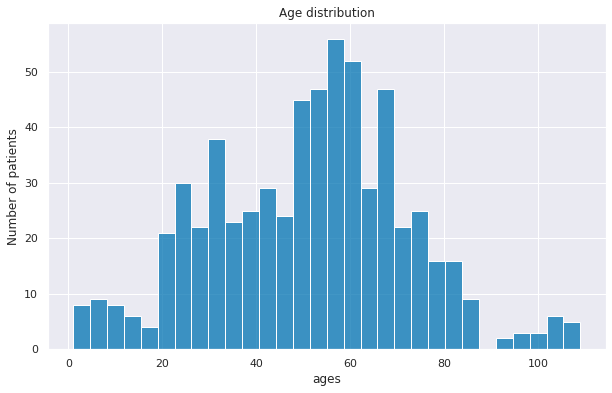

In [ ]:
print(df_train['age'].describe())
plt.figure(figsize=(10,6))
sns.histplot(data=df_train['age'], bins=30).set(title='Age distribution', xlabel = 'ages', ylabel = 'Number of patients')
plt.show()

### Cnt_encounters

count    630.000000
mean      31.614286
std       24.356431
min        2.000000
25%       18.000000
50%       28.000000
75%       40.000000
max      336.000000
Name: cnt_encounters, dtype: float64


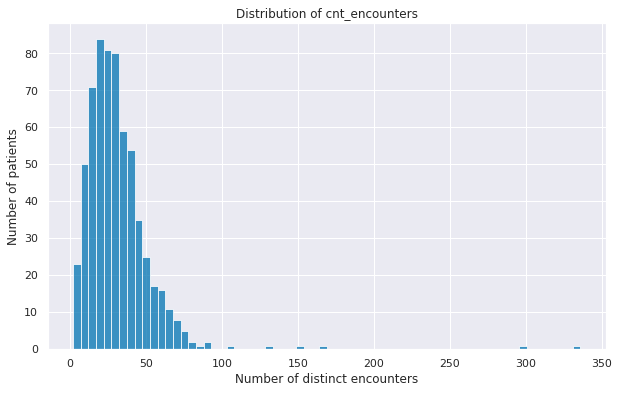

In [ ]:
print(df_train['cnt_encounters'].describe())
plt.figure(figsize=(10,6))
sns.histplot(data=df_train['cnt_encounters']).set(title='Distribution of cnt_encounters', xlabel = 'Number of distinct encounters', ylabel = 'Number of patients')
plt.show()

Here we can see that for patients with thrombosis, most of them have less than 100 encounters.

### CTs

cts is the number of Computed Tomography exams taken by the patient. Our belief was this exams would be representative for thrombosis patients, but only 1 of 630 took the exam.

In [ ]:
df_train[['cts']].value_counts()

cts
0      629
59       1
dtype: int64

In [ ]:
df_test[['cts']].value_counts()

cts
0      70
dtype: int64

### Contraceptives

The high number of zeros for contraceptive is originated by men, whom does not take contraceptives. If we look only for women, the numbers follow a better distribution.

count    630.000000
mean       0.387302
std        0.858418
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: contraceptive, dtype: float64


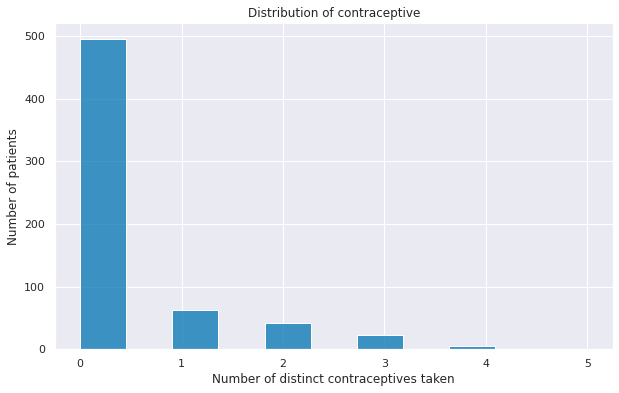

In [ ]:
print(df_train['contraceptive'].describe())
plt.figure(figsize=(10,6))
sns.histplot(data=df_train['contraceptive']).set(title='Distribution of contraceptive', xlabel = 'Number of distinct contraceptives taken', ylabel = 'Number of patients')
plt.show()

count    318.000000
mean       0.767296
std        1.081505
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: contraceptive, dtype: float64


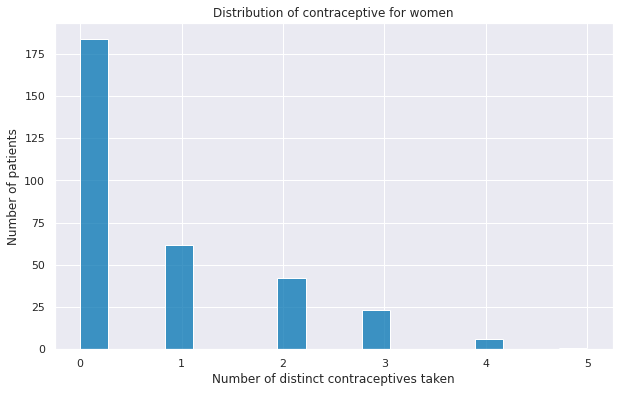

In [ ]:
print(df_train[df_train['gender'] == 'F']['contraceptive'].describe())
plt.figure(figsize=(10,6))
sns.histplot(data=df_train[df_train['gender'] == 'F']['contraceptive']).set(title='Distribution of contraceptive for women', xlabel = 'Number of distinct contraceptives taken', ylabel = 'Number of patients')
plt.show()

### Anticoagulants

Here we can see that anticoagulants are used by all the patients from this dataset. Which makes sense because it is a form of treatment for some cases.

In [ ]:
print(df_train[['anticoagulant']].value_counts())
sum = np.sum(df_train['anticoagulant'].value_counts())
print(f'Sum of anticoagulants: {sum}')

anticoagulant
2                575
3                 30
1                 23
4                  2
dtype: int64
Sum of anticoagulants: 630


count    630.000000
mean       2.017460
std        0.310924
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: anticoagulant, dtype: float64


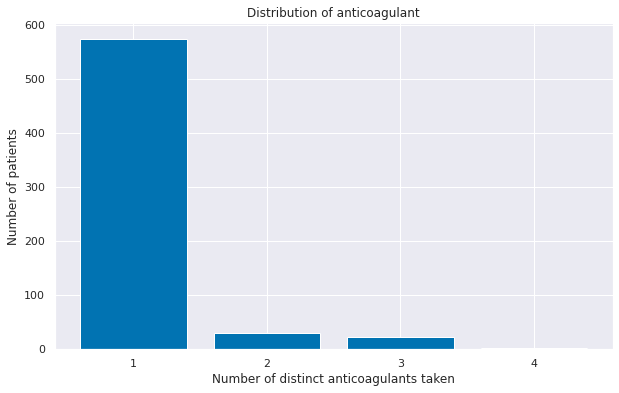

In [ ]:
print(df_train['anticoagulant'].describe())
plt.figure(figsize=(10,6))
plt.bar(['1','2', '3', '4'], df_train['anticoagulant'].value_counts())
plt.title('Distribution of anticoagulant')
plt.xlabel('Number of distinct anticoagulants taken')
plt.ylabel('Number of patients')
plt.show()

Here we can see that most of the patients with thrombosis takes 2 different anticoagulants

### Cnt_medications

count    630.000000
mean       9.490476
std        3.721515
min        3.000000
25%        7.000000
50%        9.000000
75%       12.000000
max       24.000000
Name: cnt_medications, dtype: float64


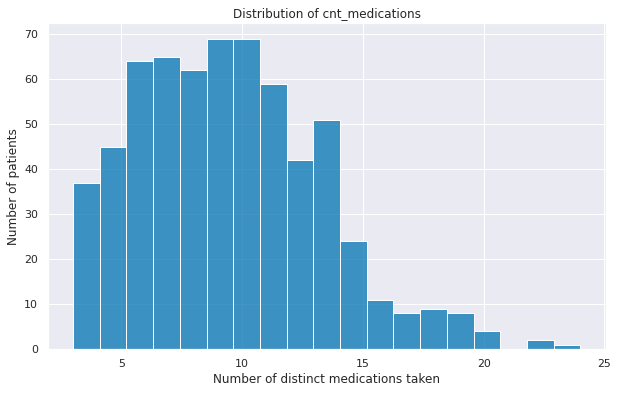

In [ ]:
print(df_train['cnt_medications'].describe())
plt.figure(figsize=(10,6))
sns.histplot(data=df_train['cnt_medications']).set(title='Distribution of cnt_medications', xlabel = 'Number of distinct medications taken', ylabel = 'Number of patients')
plt.show()

Here we can see that most of the patients with thrombosis takes around 10 different medications, which can show that they might have other health problems.

### Cnt_procedures

In [ ]:
df_train[['cnt_procedures']].value_counts()

cnt_procedures
0                 619
1                  11
dtype: int64

For the procedures, we are looking for the number of different surgeries that patient has done. We can see that most of the patients with thrombosis did not have any surgery, which can indicate that the thrombosis was caused by other factors.

### Last_encounter_dur

count    630.000000
mean       9.395238
std        3.195432
min        0.000000
25%        8.000000
50%       10.000000
75%       12.000000
max       13.000000
Name: last_encounter_dur, dtype: float64


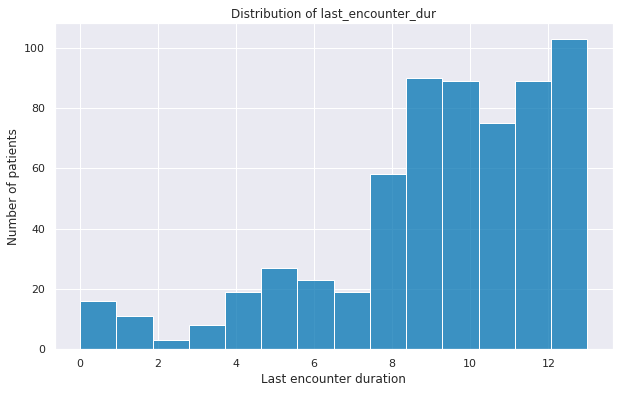

In [ ]:
print(df_train['last_encounter_dur'].describe())
plt.figure(figsize=(10,6))
sns.histplot(data=df_train['last_encounter_dur']).set(title='Distribution of last_encounter_dur', xlabel = 'Last encounter duration', ylabel = 'Number of patients')
plt.show()

Here can see that for most of the patients with thrombosis, their encounter lasted around 10 days.

### Condition_dur

count    630.000000
mean     115.882540
std      222.986263
min        0.000000
25%        1.250000
50%        4.000000
75%        8.000000
max      783.000000
Name: condition_dur, dtype: float64


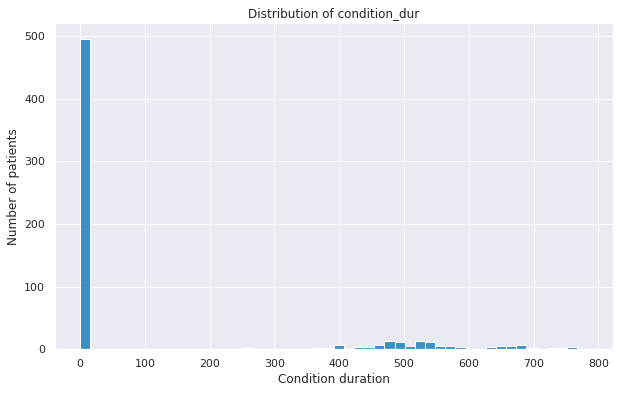

In [ ]:
print(df_train['condition_dur'].describe())
plt.figure(figsize=(10,6))
sns.histplot(data=df_train['condition_dur'], bins=50).set(title='Distribution of condition_dur', xlabel = 'Condition duration', ylabel = 'Number of patients')
plt.show()

Here we can see that most of the conditions_dur lasted less than 10 days, but we have some that lasted more than 500 days. It may happen because if the stop_condition cell is empty, we consider that the condition ended today, so this may be the cause for the occurence of such big durations.

Also, we can see by the quartiles that we have a lot of 0s in this feature, which makes us question if this feature is appropriate. Since we know that the condition of thrombosis doesn't go away that quickly.

## Target

In [ ]:
df_train[['target']].value_counts()

target
0         494
1         136
dtype: int64

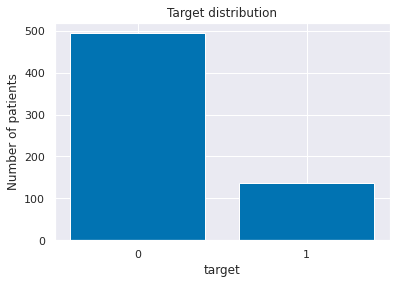

In [ ]:
plt.bar(['0','1'], df_train['target'].value_counts())
plt.title('Target distribution')
plt.xlabel('target')
plt.ylabel('Number of patients')
plt.show()

Here we can see that we have a imbalanced problem as most patients with thrombosis did not die in 5 years.

## Correlation between the features

In [ ]:

corr = df_train.corr(method='pearson')
corr

,age,cnt_encounters,cts,contraceptive,anticoagulant,cnt_medications,cnt_procedures,last_encounter_dur,condition_dur,target
age,1.000000,0.632664,0.000052,-0.260802,0.145185,0.262295,0.029775,-0.260688,0.453827,0.444533
cnt_encounters,0.632664,1.000000,-0.012475,-0.161346,0.108167,0.271672,0.005100,-0.190665,0.282180,0.278918
cts,0.000052,-0.012475,1.000000,-0.018004,-0.002241,0.037631,-0.005315,-0.104839,-0.020738,0.075992
contraceptive,-0.260802,-0.161346,-0.018004,1.000000,-0.055160,0.329611,-0.003678,-0.013584,-0.168798,-0.169451
anticoagulant,0.145185,0.108167,-0.002241,-0.055160,1.000000,0.176698,0.031516,0.017046,-0.055325,-0.079161
cnt_medications,0.262295,0.271672,0.037631,0.329611,0.176698,1.000000,0.057374,-0.269270,0.360875,0.349947
cnt_procedures,0.029775,0.005100,-0.005315,-0.003678,0.031516,0.057374,1.000000,0.029045,-0.005314,-0.011034
last_encounter_dur,-0.260688,-0.190665,-0.104839,-0.013584,0.017046,-0.269270,0.029045,1.000000,-0.503496,-0.516862
condition_dur,0.453827,0.282180,-0.020738,-0.168798,-0.055325,0.360875,-0.005314,-0.503496,1.000000,0.965475
target,0.444533,0.278918,0.075992,-0.169451,-0.079161,0.349947,-0.011034,-0.516862,0.965475,1.000000


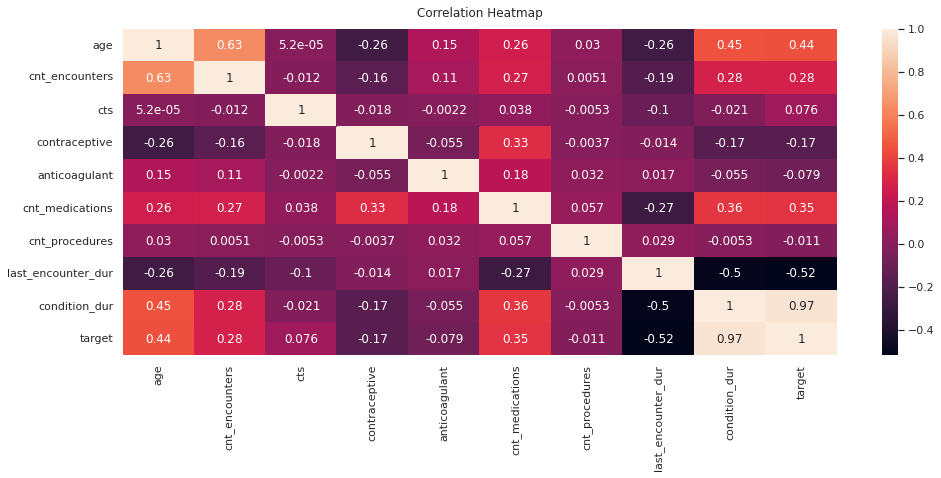

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In this correlation heatmap is possible to match the features with more correlation to each other. The three couples that stands out are:

1.   age x cnt_encounters (0.63) - Older patients are more likely to have more medical encounters over the time. 
2.   last_encounter_dur x condition_dur (-0.5) - A reason for this correlation may be the quantity of cases without closure, so last_encounter_dur and condition_dur are both high.
3.   age x condition_dur (0.44) - Similar to the first correlation, older patients are more likely to have a longer period health problems.

In contrast, the feature cts had the lower correlations; which is due the high quantity of zeros in the feature, going against we thought prior.

For correlation to the target, the three features that are more correlated are:

1.   target x condition_dur (0.97) - This is a really strong correlation and are graphically explained in the following.
2.   target x last_encounter_dur (-0.52) - A longer medical encounter means a severer condition and probably harder to recover.
3.   target x age (0.44) - Older patients commonly have health more fragile and are more likely to die.

### Correlation between condition_dur and target

As we saw above, condition_dur has a high correlation with target, so we are doing some plots to investigate this correlation

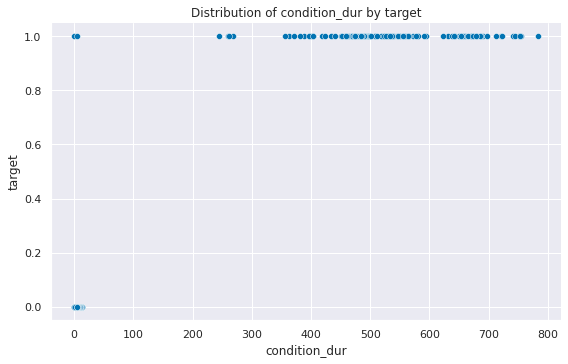

In [ ]:
sns.relplot(data=df_train[['target', 'condition_dur']], x='condition_dur', y='target', aspect=1.61).set(title='Distribution of condition_dur by target')
plt.show()

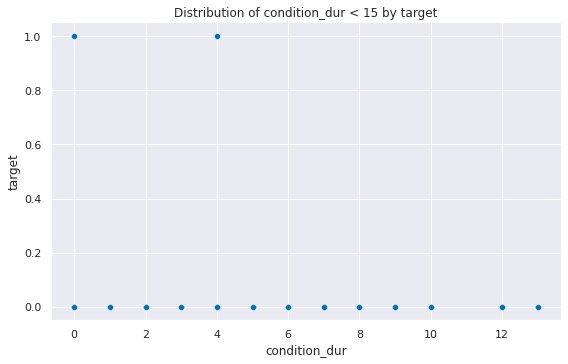

In [ ]:
sns.relplot(data=df_train[df_train['condition_dur']<15][['target', 'condition_dur']], x='condition_dur', y='target', aspect=1.61).set(title='Distribution of condition_dur < 15 by target')
plt.show()

As we can see on these plots, if the duration of the condition is bigger than 13 days, the patient will certainly die. This explains the high correlation with target.